In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

%matplotlib inline

In [2]:
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks")

In [3]:
from mix_tools import *
from projection_tools import *

In [4]:
from utilities import *

# load small scales C_l and generate maps

In [28]:
def log_pol_tens_to_map(log_pol_tens):
    P = np.sqrt(log_pol_tens[1] ** 2 + log_pol_tens[2] ** 2)
    m = np.empty_like(log_pol_tens)
    exp_i = np.exp(log_pol_tens[0])
    m[0] = exp_i * np.cosh(P)
    m[1:] = log_pol_tens[1:] / P * exp_i * np.sinh(P)
    return m

In [29]:
output_nside = 2048 
output_lmax = 2 * output_nside

In [30]:
ss_cl = np.load('/global/cscratch1/sd/jianyao/Dust/small_scales_cl.npy')
ss_cl_pt = hp.read_cl('/global/cscratch1/sd/jianyao/Dust/small_scales_logpoltens_cl_lmax4096.fits')

In [31]:
ss_cl = np.row_stack((ss_cl, np.zeros(output_lmax + 1)))
ss_cl_pt = np.row_stack((ss_cl_pt, np.zeros(output_lmax + 1)))

In [32]:
ss_cl_pt.shape

(4, 4097)

In [33]:
ss_cl.shape

(4, 4097)

In [38]:
log_ss_pt = hp.synfast(ss_cl_pt, lmax=output_lmax, new=True,nside=output_nside) # maps generated from small iqu cls
ss_pt = log_pol_tens_to_map(log_ss_pt)

ss = hp.synfast(ss_cl, lmax=output_lmax, new=True,nside=output_nside) #maps generated from IQU cls

In [39]:
ss.shape

(3, 50331648)

In [40]:
header = set_header(0, 15, size_patch=3.75/60, Npix=320)
patch_ss = h2f(ss[0], header)
patch_ss_pt = h2f(ss_pt[0], header)

img_ss_pt = rescale_min_max(patch_ss_pt)
rhos_ss_pt, f_ss_pt, u_ss_pt, chi_ss_pt = get_functionals(img_ss_pt)

img_ss = rescale_min_max(patch_ss)
rhos_ss, f_ss, u_ss, chi_ss = get_functionals(img_ss)

In [98]:
test = get_functionals(img_ss_pt)

In [94]:
fig, axes = plt.subplots(1,3,figsize = (20,4))

axes[0].plot(rhos_ss, f_ss)
axes[0].plot(rhos_ss_pt, f_ss_pt)

axes[0].set_xlabel(r'$\rho$', fontsize=20)
axes[0].set_ylabel(r'$\mathcal{V}_1(\rho$)', fontsize=20)
axes[1].plot(rhos_ss, u_ss)
axes[1].plot(rhos_ss_pt, u_ss_pt)

axes[1].set_xlabel(r'$\rho$', fontsize=20)
axes[1].set_ylabel(r'$\mathcal{V}_2(\rho$)', fontsize=20)
axes[2].plot(rhos_ss, chi_ss)
axes[2].plot(rhos_ss, chi_ss_pt)

axes[2].set_xlabel(r'$\rho$', fontsize=20)
axes[2].set_ylabel(r'$\mathcal{V}_3(\rho$)', fontsize=20)

Text(0, 0.5, '$\\mathcal{V}_3(\\rho$)')

In [89]:
def rescale_min_max(img, a=-1, b=1, return_min_max=False):
    img_resc = (b-a)*(img-np.min(img))/(np.max(img)-np.min(img))+a
    if return_min_max:
        return img_resc, np.min(img), np.max(img)
    else:
        return img_resc

# load results

In [17]:
F_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/F_ss_pt.npy')
U_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/U_ss_pt.npy')
Chi_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/Chi_ss_pt.npy')

F_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/F_ss.npy')
U_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/U_ss.npy')
Chi_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/Chi_ss.npy')

F_pt_mean = np.mean(F_ss_pt, axis = 0); F_pt_std = np.std(F_ss_pt, axis = 0); 
U_pt_mean = np.mean(U_ss_pt, axis = 0); U_pt_std = np.std(U_ss_pt, axis = 0);
Chi_pt_mean = np.mean(Chi_ss_pt, axis = 0); Chi_pt_std = np.std(Chi_ss_pt, axis = 0);

F_mean = np.mean(F_ss, axis = 0); F_std = np.std(F_ss, axis = 0); 
U_mean = np.mean(U_ss, axis = 0); U_std = np.std(U_ss, axis = 0); 
Chi_mean = np.mean(Chi_ss, axis = 0); Chi_std = np.std(Chi_ss, axis = 0); 

In [36]:
empty_image = np.random.rand(320, 320)
img = rescale_min_max(empty_image)
rhos_ss, f, u, chi= get_functionals(img)

In [37]:
rhos_ss

array([-1.        , -0.93548387, -0.87096774, -0.80645161, -0.74193548,
       -0.67741935, -0.61290323, -0.5483871 , -0.48387097, -0.41935484,
       -0.35483871, -0.29032258, -0.22580645, -0.16129032, -0.09677419,
       -0.03225806,  0.03225806,  0.09677419,  0.16129032,  0.22580645,
        0.29032258,  0.35483871,  0.41935484,  0.48387097,  0.5483871 ,
        0.61290323,  0.67741935,  0.74193548,  0.80645161,  0.87096774,
        0.93548387,  1.        ])

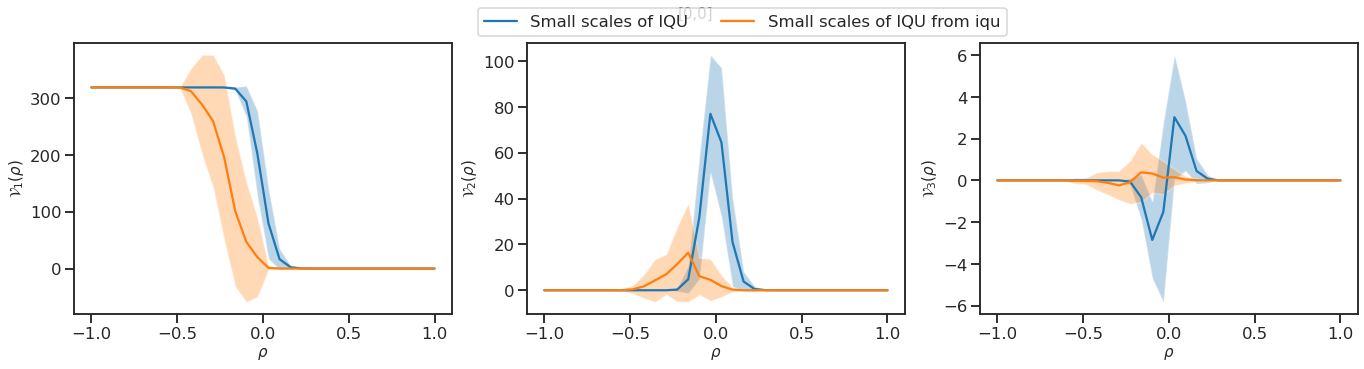

In [47]:
plot_MF(rhos_ss, F_ss, U_ss, Chi_ss, F_ss_pt, U_ss_pt, Chi_ss_pt, "[0,0]")

In [45]:
header1 = set_header(0, 15, size_patch=3.75/60, Npix=320)
F_ss1, U_ss1, Chi_ss1, F_ss_pt1, U_ss_pt1, Chi_ss_pt1 = get_MF(savedir, 50, header1) 

In [49]:
plot_MF(rhos_ss, F_ss1, U_ss1, Chi_ss1, F_ss_pt1, U_ss_pt1, Chi_ss_pt1, "[0, 15]")

In [50]:
header2 = set_header(45, 45, size_patch=3.75/60, Npix=320)
F_ss2, U_ss2, Chi_ss2, F_ss_pt2, U_ss_pt2, Chi_ss_pt2 = get_MF(savedir, 50, header2) 
plot_MF(rhos_ss, F_ss2, U_ss2, Chi_ss2, F_ss_pt2, U_ss_pt2, Chi_ss_pt2, "45, 45")

# Map Results

In [20]:
savedir = '/global/cscratch1/sd/jianyao/Dust/MFs/'

In [21]:
iqu_ss_only = hp.read_map("/global/cscratch1/sd/jianyao/Dust/MFs/dust_IQU_from_iqu_only_small_scales_000.fits", field = None)
IQU_iqu = hp.read_map("/global/cscratch1/sd/jianyao/Dust/MFs/dust_IQU_from_iqu_with_small_scales.fits", field = None) # iqu with small added
IQU_ss_only = hp.read_map("/global/cscratch1/sd/jianyao/Dust/MFs/dust_IQU_only_small_scales_000.fits", field = None)
IQU = hp.read_map(savedir + f"dust_IQU_with_small_scales.fits", field = None) # IQU with small scales added

In [25]:
lat = 15
plt.figure(figsize=(15,10))
hp.gnomview(IQU_iqu[1],cmap='RdBu',  title='Q_q', rot=[0,lat],reso=3.75,xsize=320, sub=221)
hp.gnomview(iqu_ss_only[1],cmap='RdBu',  title='Q_q_ss', rot=[0,lat],reso=3.75,xsize=320, sub=222)

hp.gnomview(IQU[1],cmap='RdBu',  title='Q', rot=[0,lat],reso=3.75,xsize=320, sub=223)
hp.gnomview(IQU_ss_only[1],cmap='RdBu',  title='Q_ss', rot=[0,lat],reso=3.75,xsize=320, sub=224)

In [165]:
IQU_from_iqu = log_pol_tens_to_map(iqu)
IQU_ss_only_from_iqu = log_pol_tens_to_map(iqu_ss_only)
IQU_ori_from_iqu = log_pol_tens_to_map(iqu_ori)

In [157]:
IQU_ori = hp.read_map('/global/cscratch1/sd/jianyao/Dust/Dust_IQU_uK_RJ.fits', field = None)
iqu_ori = hp.read_map('/global/cscratch1/sd/jianyao/Dust/dust_gnilc_logpoltens_varres_nomono.fits', field = None) 

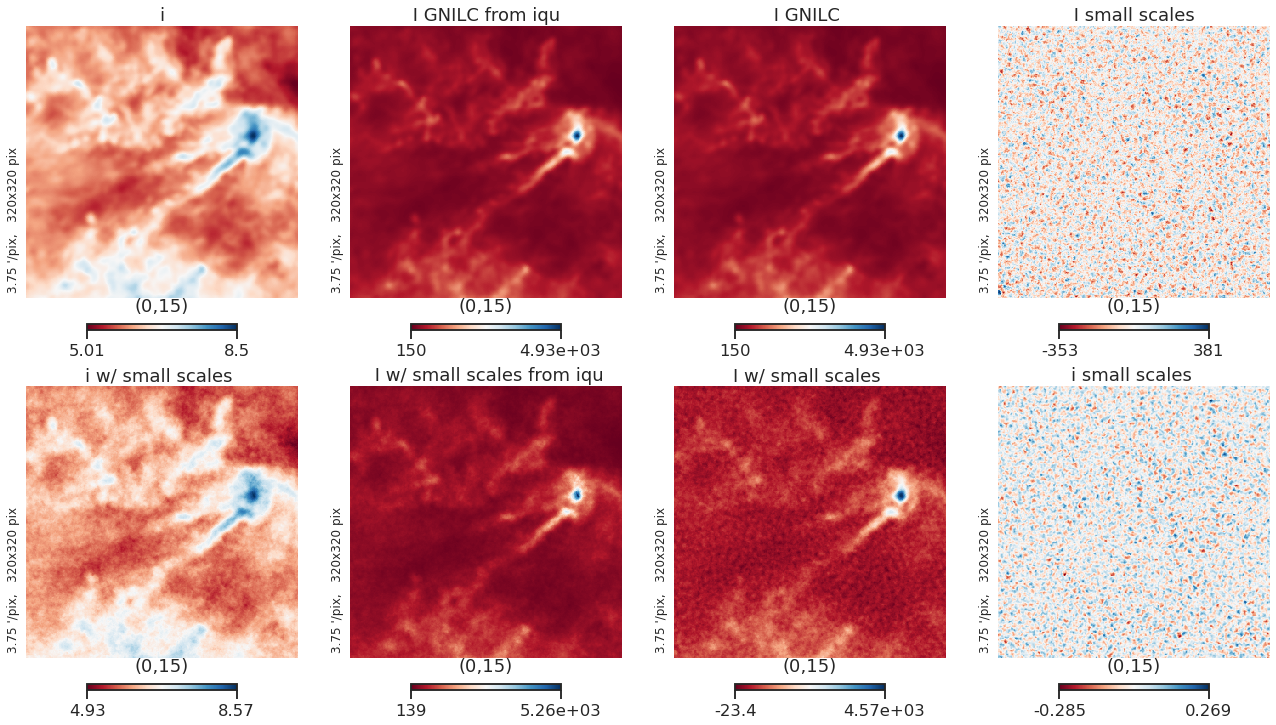

In [192]:
lat=15
plt.figure(figsize=(18,10))
hp.gnomview(iqu_ori[0],cmap='RdBu',  title='i', rot=[0,lat],reso=3.75,xsize=320, sub=241 )
hp.gnomview((IQU_ori_from_iqu[0]),cmap='RdBu',  title=' I GNILC from iqu ', rot=[0,lat],reso=3.75,xsize=320,  sub=242, )
hp.gnomview((IQU_ori[0]),cmap='RdBu',  title=' I GNILC  ', rot=[0,lat],reso=3.75,xsize=320,  sub=243, )
# hp.gnomview((modulate_amp),cmap='RdBu',  title=' modulation I ', rot=[0,lat],reso=3.75,xsize=320,  sub=233, )
hp.gnomview(IQU_ss_only[0], cmap='RdBu',  title=' I small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=244, )
hp.gnomview(iqu[0] ,cmap='RdBu',   title='i w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=245 )
hp.gnomview(IQU_from_iqu[0], cmap='RdBu',  title=' I w/ small scales from iqu', rot=[0,lat],reso=3.75,xsize=320,  sub=246, )
hp.gnomview(IQU[0],cmap='RdBu' ,  title='I w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=247 )
hp.gnomview(iqu_ss_only[0],cmap='RdBu',  title='i small scales ', rot=[0,lat], reso=3.75,xsize=320, sub=248 )

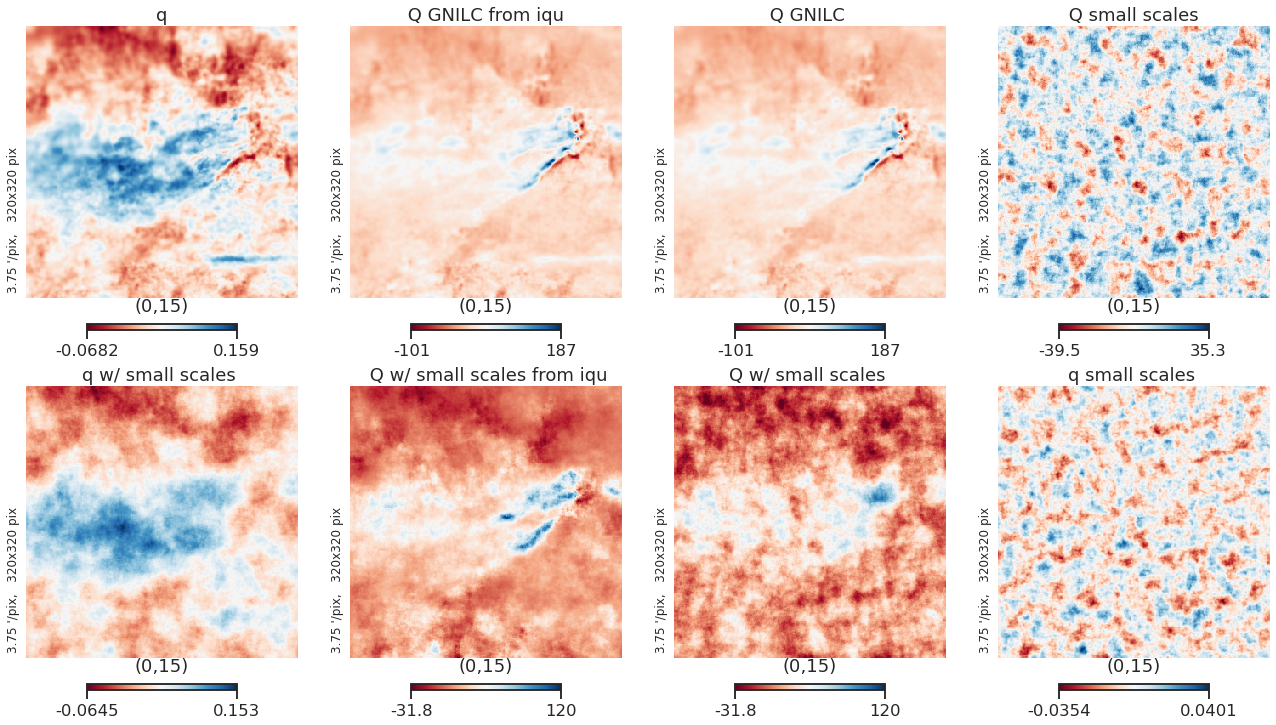

In [195]:
lat=15
plt.figure(figsize=(18,10))
hp.gnomview(iqu_ori[1],cmap='RdBu',  title='q', rot=[0,lat],reso=3.75,xsize=320, sub=241 )
hp.gnomview((IQU_ori_from_iqu[1]),cmap='RdBu',  title=' Q GNILC from iqu ', rot=[0,lat],reso=3.75,xsize=320,  sub=242, )
hp.gnomview((IQU_ori[1]),cmap='RdBu',  title=' Q GNILC  ', rot=[0,lat],reso=3.75,xsize=320,  sub=243, )
# hp.gnomview((modulate_amp),cmap='RdBu',  title=' modulation I ', rot=[0,lat],reso=3.75,xsize=320,  sub=233, )
hp.gnomview(IQU_ss_only[1], cmap='RdBu',  title=' Q small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=244, )
hp.gnomview(iqu[1] ,cmap='RdBu',   title='q w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=245 )
hp.gnomview(IQU_from_iqu[1], cmap='RdBu',  title=' Q w/ small scales from iqu', rot=[0,lat],reso=3.75,xsize=320,  sub=246, min = -31.8, max = 120)
hp.gnomview(IQU[1],cmap='RdBu' ,  title='Q w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=247, min = -31.8, max = 120)
hp.gnomview(iqu_ss_only[1],cmap='RdBu',  title='q small scales ', rot=[0,lat], reso=3.75,xsize=320, sub=248 )

# Test large scales

In [178]:
lmax = 2048; spectra_components = ["TT", "EE", "BB"]; ell_fit_high = {"TT":400, "EE":110, "BB":110}
output_nside = 2048 
output_lmax = 2 * output_nside
log_pol_tens_varres = hp.read_map('/global/cscratch1/sd/jianyao/Dust/dust_gnilc_logpoltens_varres_nomono.fits', field = None) ### original maps in iqu
log_ls = get_large_scales(log_pol_tens_varres, lmax, spectra_components, ell_fit_high, output_nside)
ls_from_iqu = log_pol_tens_to_map(log_ls)

In [ ]:
ell_fit_high = {"TT":400, "EE":110, "BB":110}

dust_IQU = hp.read_map('/global/cscratch1/sd/jianyao/Dust/Dust_IQU_uK_RJ.fits', field = None) ### original maps in IQU
ls = get_large_scales(dust_IQU, lmax, spectra_components, ell_fit_high, output_nside)

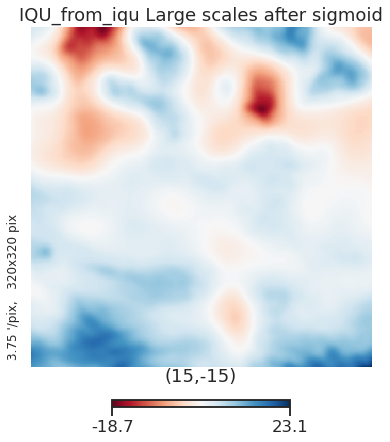

In [201]:
hp.gnomview(ls_from_iqu[1], rot = [15, -15],reso=3.75,xsize=320,cmap='RdBu', cbar = True, title = "IQU_from_iqu Large scales after sigmoid")

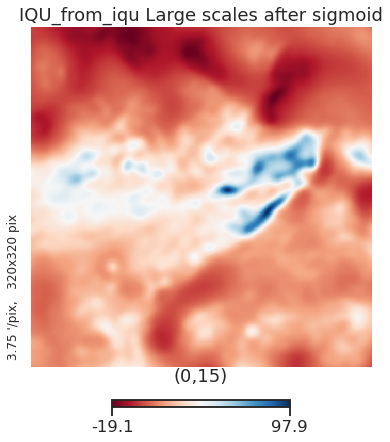

In [185]:
hp.gnomview(ls_from_iqu[1], rot = [0, 15],reso=3.75,xsize=320,cmap='RdBu', cbar = True, title = "IQU_from_iqu Large scales after sigmoid")

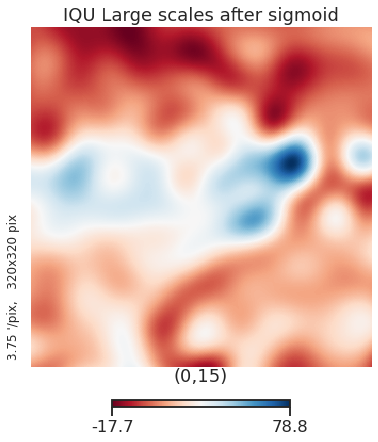

In [184]:
hp.gnomview(ls[1], rot = [0, 15],reso=3.75,xsize=320,cmap='RdBu', cbar = True, title = "IQU Large scales after sigmoid")

In [187]:
ell, cl_norm, cl_IQU = run_anafast(IQU, lmax)
ell, cl_norm, cl_IQU_from_iqu = run_anafast(IQU_from_iqu, lmax)

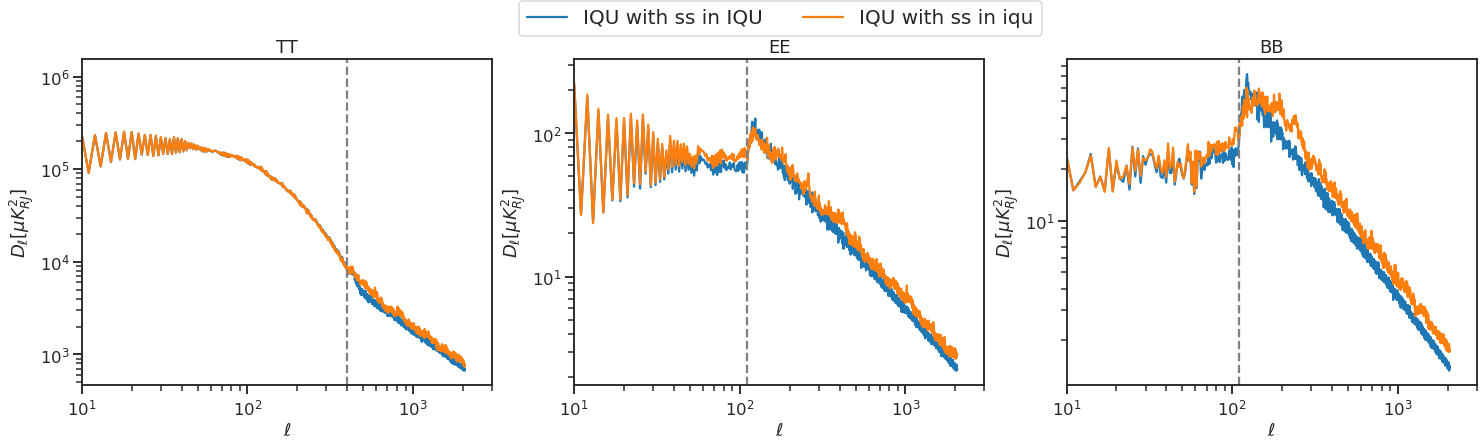

In [189]:
modes = ['TT', 'EE', 'BB']
fig, axes = plt.subplots(1,3, figsize=(25,6))
for i in range(3):
    ax = axes[i]
    
    if i == 0:
        ax.loglog(ell,  cl_norm*(cl_IQU[modes[i]]), label = 'IQU with ss in IQU'); 
        ax.loglog(ell,  cl_norm*(cl_IQU_from_iqu[modes[i]]), label = 'IQU with ss in iqu'); 
    else:
        ax.loglog(ell,  cl_norm*(cl_IQU[modes[i]])); 
        ax.loglog(ell,  cl_norm*(cl_IQU_from_iqu[modes[i]])); 
    
    ax.set_title(modes[i])
    ax.set_ylabel("$ D_\ell  [\mu K_{RJ}^2]$")
    ax.set_xlabel(("$\ell$"))
    ax.set_xlim(10,3e3) 
    
    # ax.axvline(ell_fit_low[modes[i]], linestyle="--", color="black")
    ax.axvline(ell_fit_high[modes[i]], linestyle="--", color="gray")

fig.legend(loc = (0.35, 0.92), ncol = 2, fontsize = 20)

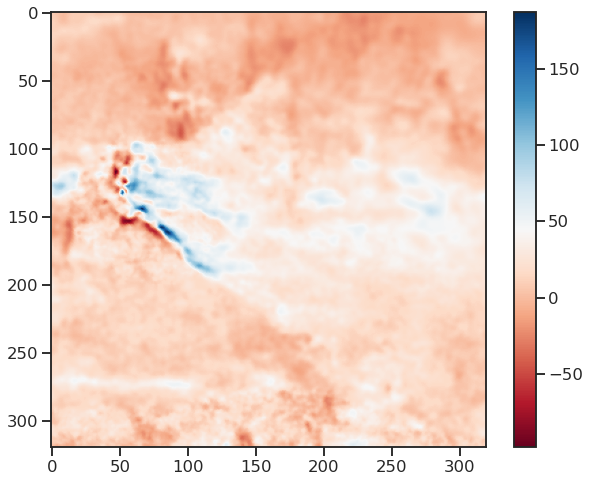

In [90]:
header = set_header(0, 15, size_patch=3.75/60, Npix=320)
patch_Q = h2f(dust_IQU[1], header)
plt.figure(figsize = (10, 8))
plt.imshow(patch_Q,cmap='RdBu')
plt.colorbar()

In [186]:
def run_anafast(m, lmax):
    clanaf = hp.anafast(m, lmax=lmax)
    cl = {}
    cl["TT"] = clanaf[0]; cl["EE"] = clanaf[1]
    cl["BB"] = clanaf[2]; cl["TE"] = clanaf[3]
    ell = np.arange(lmax + 1)

    cl_norm = ell * (ell + 1) / np.pi / 2
    cl_norm[0] = 1
    return ell, cl_norm, cl

In [203]:
print("%03d"%11)

011


In [42]:
def get_MF(path, N,  header):
    F_ss_pt = []; U_ss_pt = []; Chi_ss_pt = [];
    F_ss = []; U_ss = []; Chi_ss = [];
    for i in range(N):
        ss = hp.read_map(path + "dust_IQU_only_small_scales_%03d.fits"%i, field = None)
        ss_pt = hp.read_map(path+"dust_IQU_from_iqu_only_small_scales_%03d.fits"%i, field = None)
        
        patch_ss = h2f(ss[0], header)
        patch_ss_pt = h2f(ss_pt[0], header)

        img_ss_pt = rescale_min_max(patch_ss_pt)
        rhos_ss_pt, f_ss_pt, u_ss_pt, chi_ss_pt = get_functionals(img_ss_pt)
        F_ss_pt.append(f_ss_pt);
        U_ss_pt.append(u_ss_pt);
        Chi_ss_pt.append(chi_ss_pt);

        img_ss = rescale_min_max(patch_ss)
        rhos_ss, f_ss, u_ss, chi_ss = get_functionals(img_ss)
        F_ss.append(f_ss);
        U_ss.append(u_ss);
        Chi_ss.append(chi_ss);
    
    return F_ss, U_ss, Chi_ss, F_ss_pt, U_ss_pt, Chi_ss_pt

In [46]:
def plot_MF(rhos_ss, F_ss, U_ss, Chi_ss, F_ss_pt, U_ss_pt, Chi_ss_pt, title):
    
    F_pt_mean = np.mean(F_ss_pt, axis = 0); F_pt_std = np.std(F_ss_pt, axis = 0); 
    U_pt_mean = np.mean(U_ss_pt, axis = 0); U_pt_std = np.std(U_ss_pt, axis = 0);
    Chi_pt_mean = np.mean(Chi_ss_pt, axis = 0); Chi_pt_std = np.std(Chi_ss_pt, axis = 0);

    F_mean = np.mean(F_ss, axis = 0); F_std = np.std(F_ss, axis = 0); 
    U_mean = np.mean(U_ss, axis = 0); U_std = np.std(U_ss, axis = 0); 
    Chi_mean = np.mean(Chi_ss, axis = 0); Chi_std = np.std(Chi_ss, axis = 0); 
    
    fig, axes = plt.subplots(1,3,figsize = (23,5))

    axes[0].plot(rhos_ss, F_mean, label = 'Small scales of IQU')
    axes[0].fill_between(rhos_ss, F_mean - F_std, F_mean + F_std, alpha = 0.3)
    axes[0].plot(rhos_ss, F_pt_mean, label = 'Small scales of IQU from iqu')
    axes[0].fill_between(rhos_ss, F_pt_mean - F_pt_std, F_pt_mean + F_pt_std, alpha = 0.3)

    axes[0].set_xlabel(r'$\rho$', fontsize=15)
    axes[0].set_ylabel(r'$\mathcal{V}_1(\rho$)', fontsize=15)

    axes[1].plot(rhos_ss, U_mean)
    axes[1].fill_between(rhos_ss, U_mean - U_std, U_mean + U_std, alpha = 0.3)
    axes[1].plot(rhos_ss, U_pt_mean)
    axes[1].fill_between(rhos_ss, U_pt_mean - U_pt_std, U_pt_mean + U_pt_std, alpha = 0.3)

    axes[1].set_xlabel(r'$\rho$', fontsize=15)
    axes[1].set_ylabel(r'$\mathcal{V}_2(\rho$)', fontsize=15)

    axes[2].plot(rhos_ss, Chi_mean)
    axes[2].fill_between(rhos_ss, Chi_mean - Chi_std, Chi_mean + Chi_std, alpha = 0.3)
    axes[2].plot(rhos_ss, Chi_pt_mean)
    axes[2].fill_between(rhos_ss, Chi_pt_mean - Chi_pt_std, Chi_pt_mean + Chi_pt_std, alpha = 0.3)

    axes[2].set_xlabel(r'$\rho$', fontsize=15)
    axes[2].set_ylabel(r'$\mathcal{V}_3(\rho$)', fontsize=15)

    fig.legend(ncol = 2, loc = (0.35, 0.9))
    fig.suptitle(title, fontsize = 15)